<a href="https://colab.research.google.com/github/Sayuru-Nimsara/ANN_tutorials/blob/mnist_final/ann_for_classsify_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries required

In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Import hand-written digits from keras library to variables

In [28]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

scale the dataset

In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
len(X_train)

60000

In [32]:
len(X_test)

10000

In [33]:
X_train[0].shape

(28, 28)

In [34]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

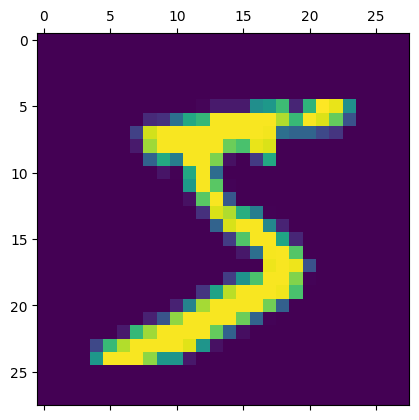

In [35]:
plt.matshow(X_train[0])

In [36]:
y_train[0]

5

See the target value of first 20 training data

In [37]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

Flat 2d array to 1d array. use pandas reshap function. this function has 2 dimention. because original shape of X_teain is (60000, 28, 28) and now we want reshape in to (60000,784)

In [38]:
X_train_flatttened = X_train.reshape(len(X_train), 28*28)
X_test_flatttened = X_test.reshape(len(X_test), 28*28)

In [39]:
X_train_flatttened.shape
X_test_flatttened.shape

(10000, 784)

In [40]:
X_train_flatttened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Create simple neural network with 784 input neurons in input layer and 10 output neurons in output layer

In [64]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
model.fit(X_train_flatttened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4699 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2663 - accuracy: 0.9257


In [65]:
model.evaluate(X_test_flatttened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2677 - accuracy: 0.9254


[0.2676592171192169, 0.9254000186920166]

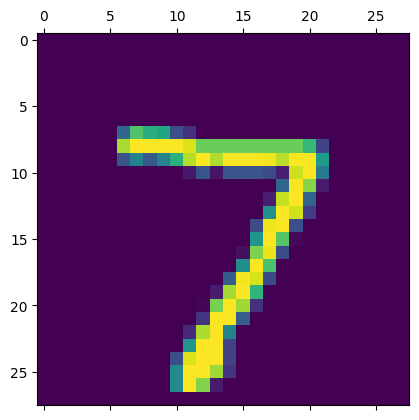

In [66]:
plt.matshow(X_test[0])

In [67]:
y_predicted = model.predict(X_test_flatttened)

313/313 [==============================] - 0s 1ms/step


This gives the values of the output layer for prediction

In [68]:
y_predicted[0]

array([1.93088632e-02, 3.71288962e-07, 7.41020665e-02, 9.63214099e-01,
       3.59464600e-03, 1.15569085e-01, 1.97835925e-06, 9.99789655e-01,
       9.75584090e-02, 5.89026570e-01], dtype=float32)

In [69]:
np.argmax(y_predicted[0])

7

In [70]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [71]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    4,    8,    2,    2,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,   10,  925,   17,    9,    3,   14,   11,   37,    3],
       [   2,    0,   19,  929,    1,   20,    2,   10,   20,    7],
       [   1,    1,    3,    1,  925,    0,   12,    3,   10,   26],
       [   8,    2,    3,   44,   12,  761,   18,    5,   34,    5],
       [   8,    3,    6,    1,    8,    8,  920,    2,    2,    0],
       [   1,    6,   24,    6,   11,    1,    0,  944,    2,   33],
       [   4,    7,    7,   24,   11,   22,   10,   11,  872,    6],
       [  10,    7,    1,   11,   40,    6,    0,   20,    7,  907]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

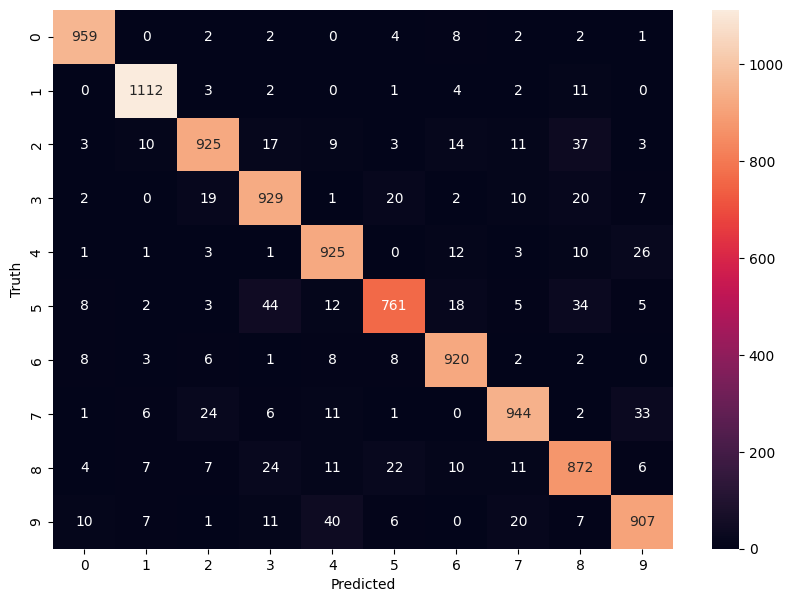

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Create modedl with hidden layer

In [75]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
model.fit(X_train_flatttened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2717 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1251 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0867 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9841


In [76]:
model.evaluate(X_test_flatttened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9748


[0.08663073182106018, 0.9747999906539917]

313/313 [==============================] - 2s 6ms/step


Text(0.5, 47.7222222222222, 'Predicted')

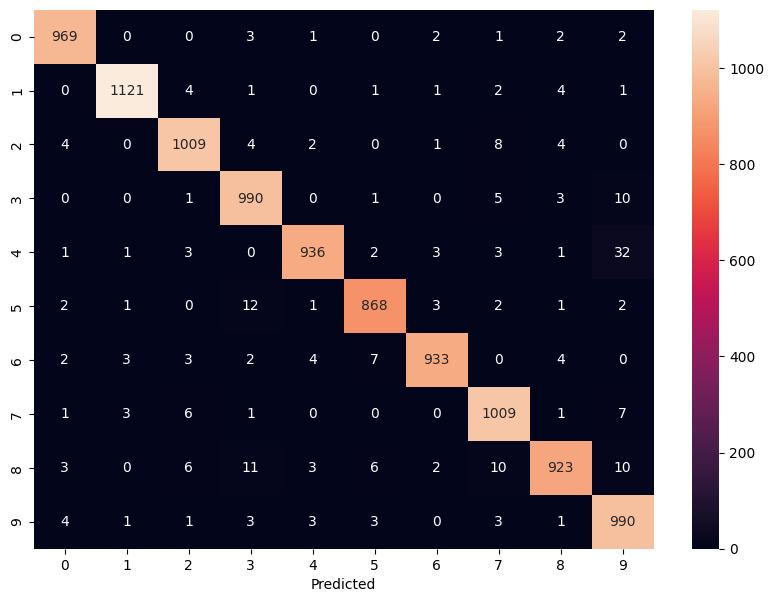

In [79]:
y_predicted = model.predict(X_test_flatttened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

Without create flattened array of input. let it handel to model

In [82]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2779 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1241 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0853 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0515 - accuracy: 0.9845
